In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [5]:
from sklearn.datasets import make_regression

In [7]:
n_samples = 100
n_features = 6
n_informative = 3

In [9]:
X, y,coef= make_regression(n_samples=n_samples, n_features=n_features, n_informative=n_informative, random_state=None, shuffle=False,noise=20,coef=True)

In [11]:
df1 = pd.DataFrame(data=X,columns=['X'+str(i) for i in range(1,n_features+1)])
df2=pd.DataFrame(data=y,columns=['y'])
df=pd.concat([df1,df2],axis=1)
df.head(10)

,X1,X2,X3,X4,X5,X6,y
0,-1.477878,1.635804,2.109109,-0.107635,0.217931,1.048243,176.659296
1,-1.129825,-1.342277,1.492960,-0.161912,0.191669,-1.197810,98.715921
2,0.472512,0.002599,0.176125,1.645380,-0.326670,1.546479,-27.936665
3,0.154719,-0.499169,0.333770,-0.908171,-1.332882,2.422527,42.577063
4,-1.125320,-0.215768,-0.152770,-1.433920,0.684970,-1.544862,4.315706
5,1.419171,1.095586,-0.088523,-0.147524,0.294294,0.935754,68.163125
6,-0.113063,0.072050,-0.431945,2.244667,0.015076,0.248087,-14.006614
7,0.749052,0.001780,-1.621905,1.140243,0.636755,-0.511534,-128.359066
8,-0.250762,-0.347037,-2.189477,-0.901436,-0.566776,-0.889894,-171.243492
9,-0.470142,-1.113327,1.521242,-0.231971,0.692577,0.326118,115.662792


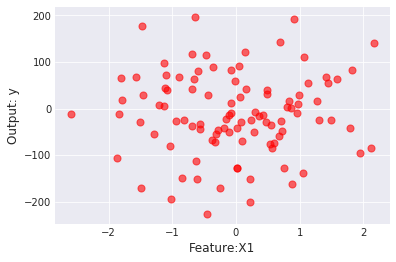

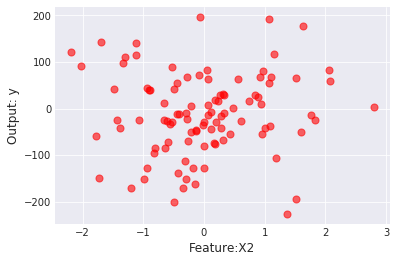

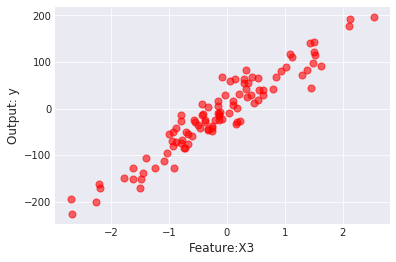

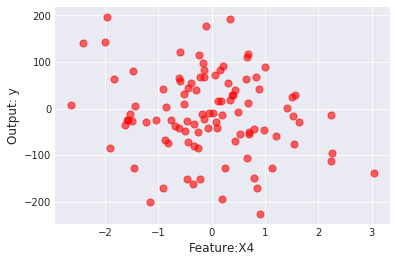

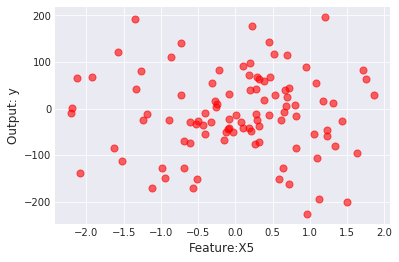

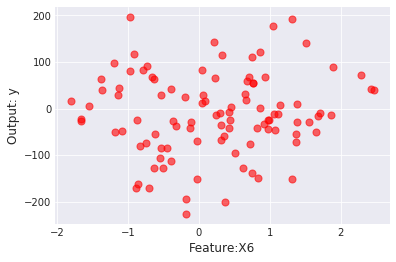

In [13]:
with plt.style.context(('seaborn-dark')):
    for i,col in enumerate(df.columns[:-1]):
        plt.figure(figsize=(6,4))
        plt.grid(True)
        plt.xlabel('Feature:'+col,fontsize=12)
        plt.ylabel('Output: y',fontsize=12)
        plt.scatter(df[col],df['y'],c='red',s=50,alpha=0.6)

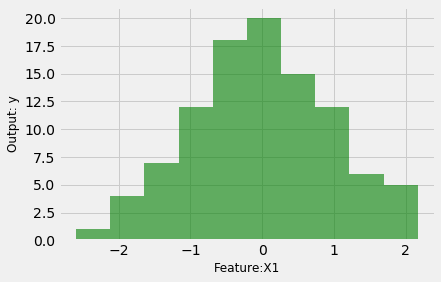

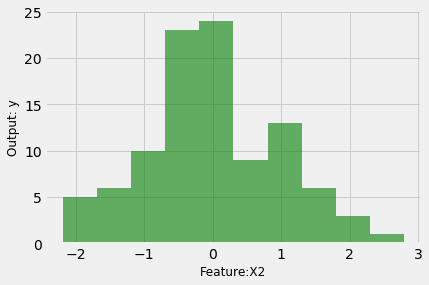

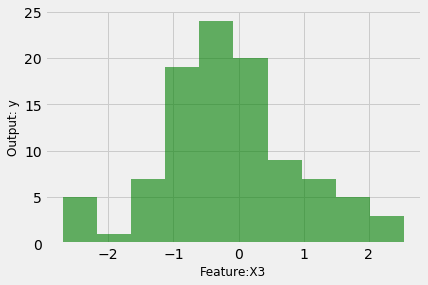

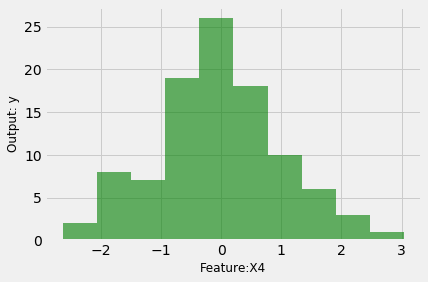

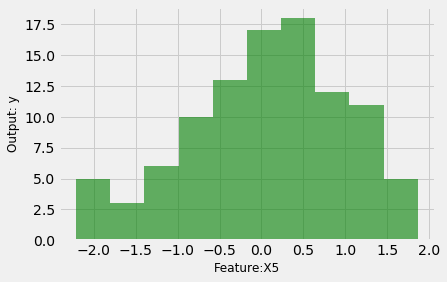

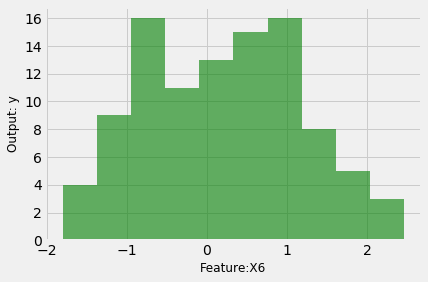

In [16]:
with plt.style.context(('fivethirtyeight')):
    for i,col in enumerate(df.columns[:-1]):
        plt.figure(figsize=(6,4))
        plt.grid(True)
        plt.xlabel('Feature:'+col,fontsize=12)
        plt.ylabel('Output: y',fontsize=12)
        plt.hist(df[col],alpha=0.6,facecolor='g')


In [17]:
from sklearn import tree

In [18]:
tree_model = tree.DecisionTreeRegressor(max_depth=5,random_state=None)
tree_model.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Relative importance of the features:  [7.68679121e-03 2.65303529e-02 9.49699216e-01 9.85992189e-03
 8.87582955e-04 5.33613486e-03]


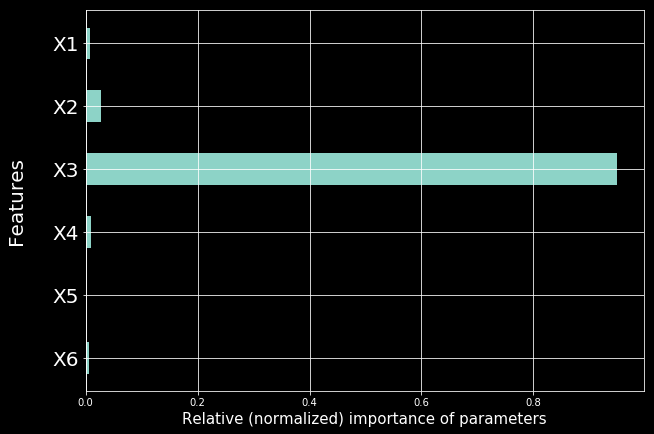

In [19]:
print("Relative importance of the features: ",tree_model.feature_importances_)
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,7))
    plt.grid(True)
    plt.yticks(range(n_features+1,1,-1),df.columns[:-1],fontsize=20)
    plt.xlabel("Relative (normalized) importance of parameters",fontsize=15)
    plt.ylabel("Features\n",fontsize=20)
    plt.barh(range(n_features+1,1,-1),width=tree_model.feature_importances_,height=0.5)

In [21]:
print("Regression coefficient:",tree_model.score(X,y))

Regression coefficient: 0.9817214195060399


In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
model = RandomForestRegressor(max_depth=5, random_state=None,max_features='auto',max_leaf_nodes=5,n_estimators=100)
model.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=5,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Relative importance of the features:  [4.00035802e-04 1.83214292e-03 9.95502950e-01 1.37654133e-03
 5.81356222e-04 3.06973883e-04]


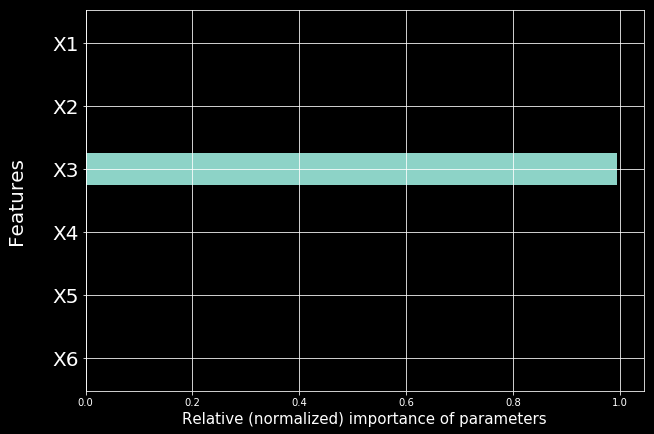

In [26]:
print("Relative importance of the features: ",model.feature_importances_)
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,7))
    plt.grid(True)
    plt.yticks(range(n_features+1,1,-1),df.columns[:-1],fontsize=20)
    plt.xlabel("Relative (normalized) importance of parameters",fontsize=15)
    plt.ylabel("Features\n",fontsize=20)
    plt.barh(range(n_features+1,1,-1),width=model.feature_importances_,height=0.5)

In [27]:
print("Regression coefficient:",model.score(X,y))

Regression coefficient: 0.9177459022964549


In [28]:
import statsmodels.api as sm

In [29]:
Xs=sm.add_constant(X)
stat_model = sm.OLS(y,Xs)
stat_result = stat_model.fit()

In [30]:
print(stat_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     256.5
Date:                Sat, 13 Jul 2019   Prob (F-statistic):           1.43e-55
Time:                        16:00:19   Log-Likelihood:                -445.37
No. Observations:                 100   AIC:                             904.7
Df Residuals:                      93   BIC:                             923.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2724      2.250     -0.121      0.9

In [31]:
rf_coef=np.array(coef)
stat_coef=np.array(stat_result.params[1:])

In [32]:
df_coef = pd.DataFrame(data=[rf_coef,stat_coef],columns=df.columns[:-1],index=['True Regressors', 'OLS method estimation'])
df_coef

,X1,X2,X3,X4,X5,X6
True Regressors,5.165102,12.239448,83.452831,0.000000,0.000000,0.000000
OLS method estimation,6.711044,14.124533,81.594504,-5.026173,0.015562,2.602913


In [33]:
df_importance = pd.DataFrame(data=[model.feature_importances_,stat_result.tvalues[1:]/sum(stat_result.tvalues[1:])],
                             columns=df.columns[:-1],
                             index=['RF Regressor relative importance', 'OLS method normalized t-statistic'])
df_importance

,X1,X2,X3,X4,X5,X6
RF Regressor relative importance,0.000400,0.001832,0.995503,0.001377,0.000581,0.000307
OLS method normalized t-statistic,0.066209,0.136020,0.824693,-0.052017,0.000144,0.024950


In [ ]:
yl = 